In [1]:
from keras.datasets import imdb
from keras.models import load_model

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)
print(y_train)

(25000,)
(25000,)
[1 0 0 ... 0 1 0]


In [3]:
from keras import preprocessing
max_len = 20
x_train = preprocessing.sequence.pad_sequences(x_train,max_len)
x_test = preprocessing.sequence.pad_sequences(x_test,max_len)

In [4]:
print(x_train.shape)


(25000, 20)


In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout,LSTM
model = Sequential()
model.add(Embedding(10000,8))
#model.add(Flatten())
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 150,273
Trainable params: 150,273
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train,y_train,epochs = 10, batch_size = 32, validation_data = (x_val,y_val))
model.save("lstm_1.h5")

C:\Users\divya\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 1000 samples
Epoch 1/10
25000/25000 [==============================] - 12s 479us/step - loss: 0.5606 - acc: 0.7002 - val_loss: 0.5034 - val_acc: 0.7480
Epoch 2/10
25000/25000 [==============================] - 12s 472us/step - loss: 0.4551 - acc: 0.7841 - val_loss: 0.4313 - val_acc: 0.8120
Epoch 3/10
25000/25000 [==============================] - 12s 474us/step - loss: 0.4290 - acc: 0.8020 - val_loss: 0.4160 - val_acc: 0.8090
Epoch 4/10
25000/25000 [==============================] - 12s 493us/step - loss: 0.4133 - acc: 0.8115 - val_loss: 0.4112 - val_acc: 0.8140
Epoch 5/10
25000/25000 [==============================] - 16s 659us/step - loss: 0.4031 - acc: 0.8180 - val_loss: 0.3984 - val_acc: 0.8210
Epoch 6/10
25000/25000 [==============================] - 32s 1ms/step - loss: 0.3925 - acc: 0.8233 - val_loss: 0.4013 - val_acc: 0.8220
Epoch 7/10
25000/25000 [==============================] - 32s 1ms/step - loss: 0.3831 - acc: 0.8290 - val_loss: 0.3851 

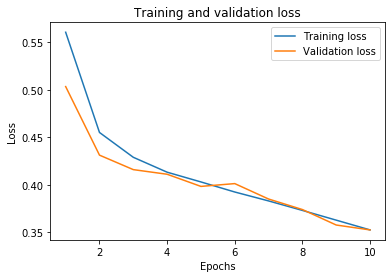

In [8]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

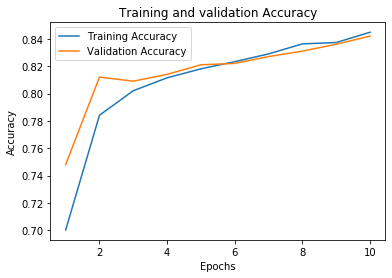

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
result =model.evaluate(x_test,y_test)
print(result)

25000/25000 [==============================] - 10s 418us/step
[0.4813276582145691, 0.7717599868774414]
